In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from utils import plot_tree_boundaries

features = ['age','acutephysiologyscore']
outcome = 'actualhospitalmortality'

data = pd.read_csv('eicu_processed.csv')

x = data[features]
y = data[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)

In the previous workbook we saw how one ensembling technique, and how it works by reweighting incorrectly classified samples, such that the ensemble's sub-models place more importance on them.

Bootstrap aggregation, or “Bagging”, is another form of ensemble learning.

With boosting, we iteratively changed the dataset to have new trees focus on the “difficult” observations. Bagging involves the same approach, except we don’t selectively choose which observations to focus on, but rather we randomly select subsets of data each time.

Boosting aimed to iteratively improve our overall model with new trees. With bagging, we now build trees on what we hope are independent datasets.

Let’s take a step back, and think about a practical example. Say we wanted a good model of heart disease. If we saw researchers build a model from a dataset of patients from their hospital, we might think this would be sufficient. If the researchers were able to acquire a new dataset from new patients, and built a new model, we’d be inclined to feel that the combination of the two models would be better than any one individually.

This is the scenario that bagging aims to replicate, except instead of actually going out and collecting new datasets, we instead use “bootstrapping” to create new sets of data from our current dataset. If you are unfamiliar with bootstrapping, you can treat it as magic for now (and if you are familiar with the bootstrap, you already know that it is magic).

Let’s take a look at a simple bootstrap model.

**Task:** Use [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to train a bagging decision tree with 6 estimators, where the `base_estimator` is a `DecisionTreeClassifier` with `max_depth=5`.

/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/seanwang/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SVC was fitted w

<Figure size 1200x600 with 0 Axes>

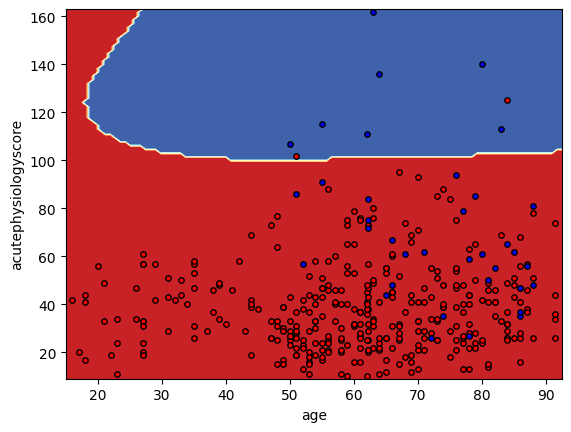

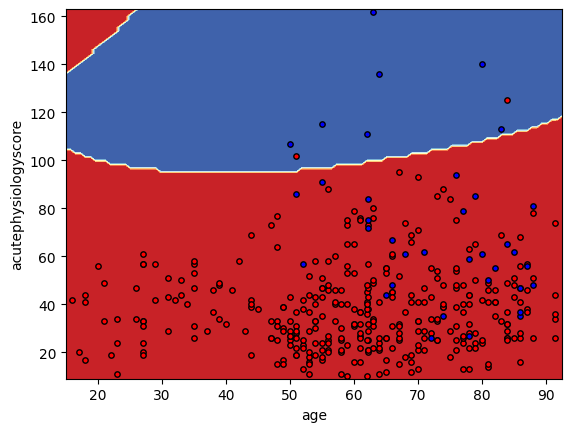

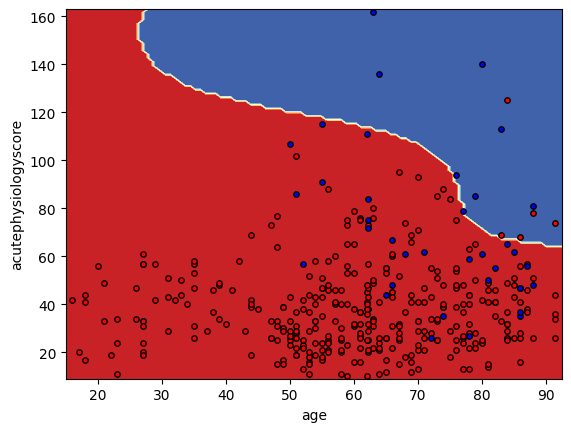

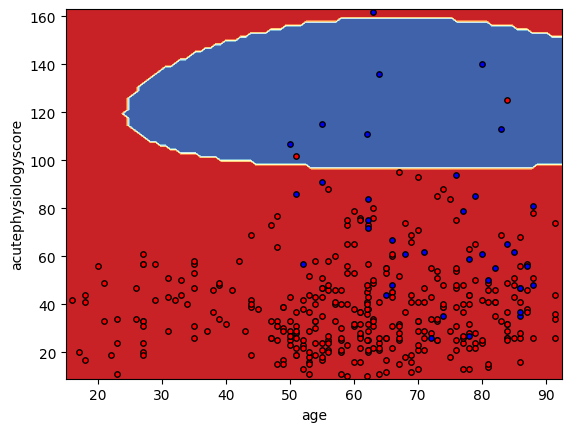

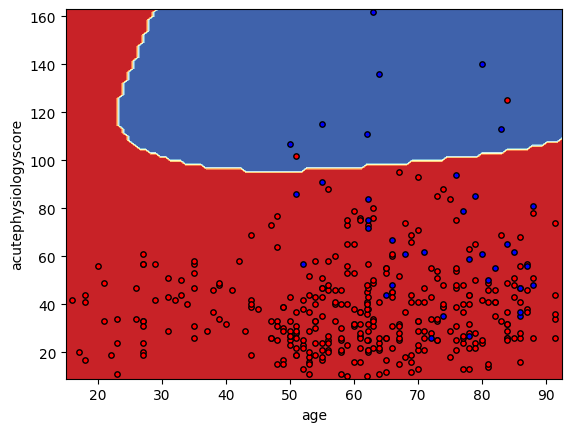

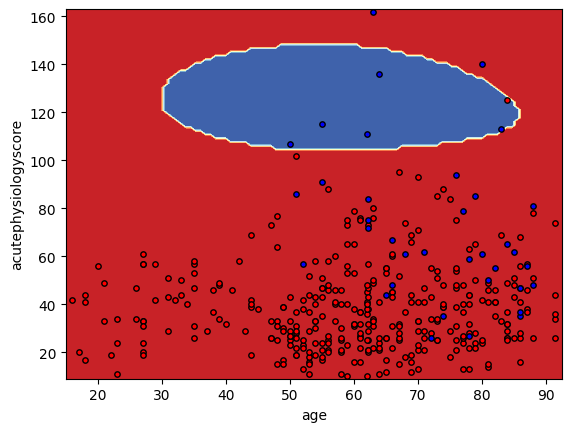

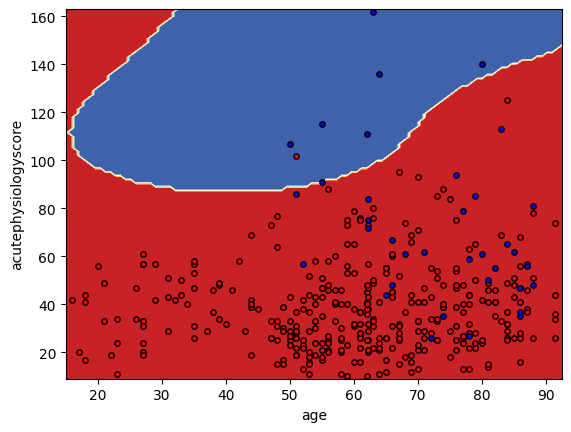

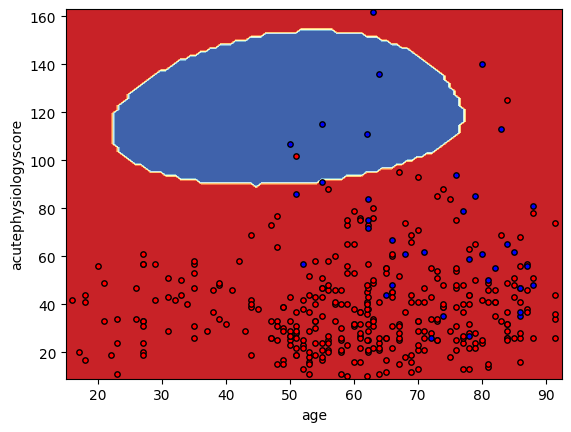

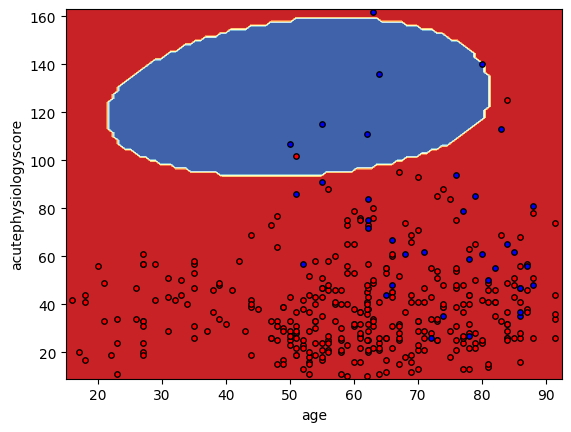

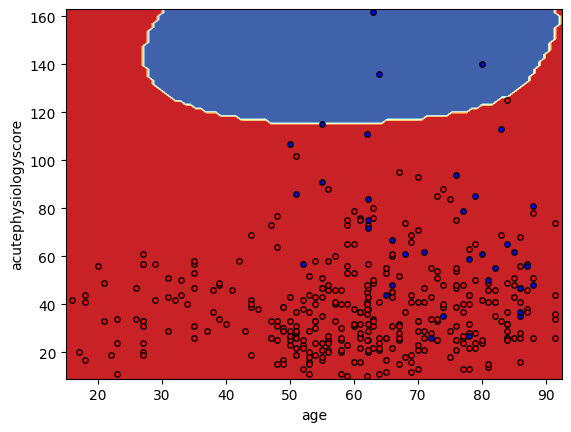

In [4]:
import numpy as np
from sklearn import tree, ensemble
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

np.random.seed(321)
tree_model = tree.DecisionTreeClassifier(max_depth=5)
ensemble_model = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=0).fit(x_train, y_train)
ensemble_model = ensemble_model.fit(x_train, y_train)

fig = plt.figure(figsize=[12,6])
for i, estimator in enumerate(ensemble_model.estimators_):    
    plot_tree_boundaries(estimator, x_train, y_train, feature_names=features, target_names=['Alive', 'Dead'])

We can see that each individual tree varies considerably. This is a result of using a random set of data to train the classifier.

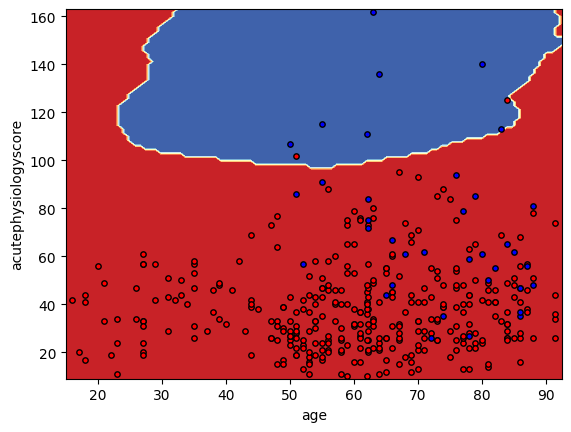

In [5]:
plot_tree_boundaries(ensemble_model, x_train, y_train, feature_names=features,  target_names=['Alive', 'Dead'])

Of course, since this is a simple dataset, we are not seeing that many dramatic changes between different models. Don’t worry, we’ll quantitatively evaluate them later.

Next up, a minor addition creates one of the most popular models in machine learning.